In [51]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import io

In [8]:
data = pd.read_csv('/Users/yunakim/Documents/2023Spring/mgsc410/Tweets.csv')
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [102]:
data.shape

(14640, 15)

In [103]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [104]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [105]:
print("Percentage null or na values in df")
((data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

airline_sentiment_gold, negativereason_gold, and tweet_coord are mostly null values so those columns can be deleted. More than third of the nagative reasons, tweet location, and user timezone are null.  

# Explore Dataset

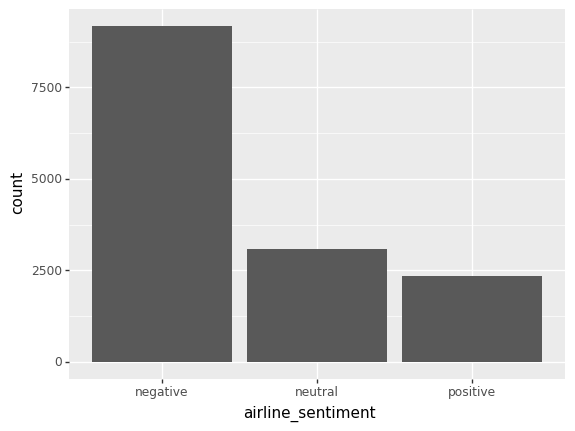

<ggplot: (8786975980403)>

In [106]:
ggplot(data, aes(x = "airline_sentiment")) + geom_bar()
# fill the density of each stick with the airlines?

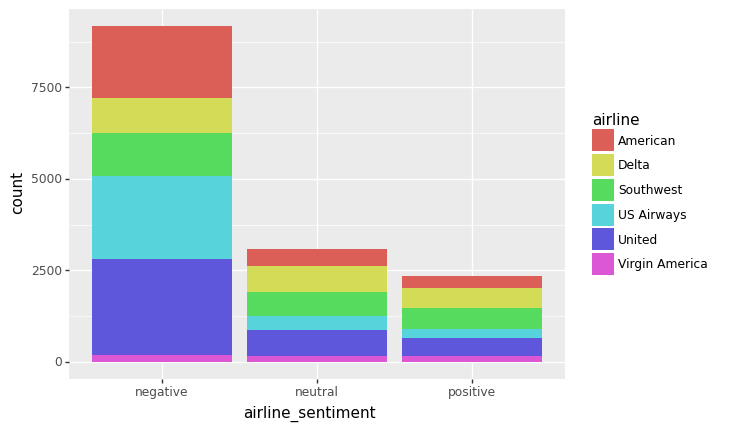

<ggplot: (8786980789495)>

In [107]:
ggplot(data, aes(x = "airline_sentiment", fill="airline")) + geom_bar()

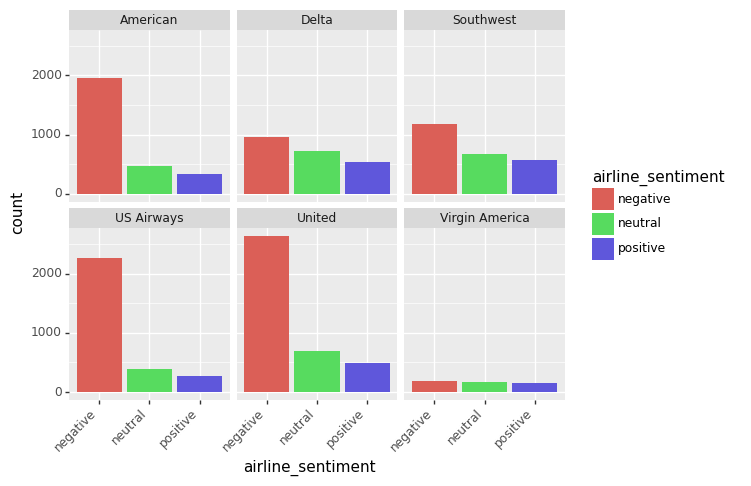

<ggplot: (8786981826826)>

In [108]:
ggplot(data, aes(x = "airline_sentiment", fill = "airline_sentiment")) + geom_bar() + facet_wrap("airline") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))



In [109]:
# ggplot(data, aes(x = "tweet_created")) + geom_line() # , y="airline"

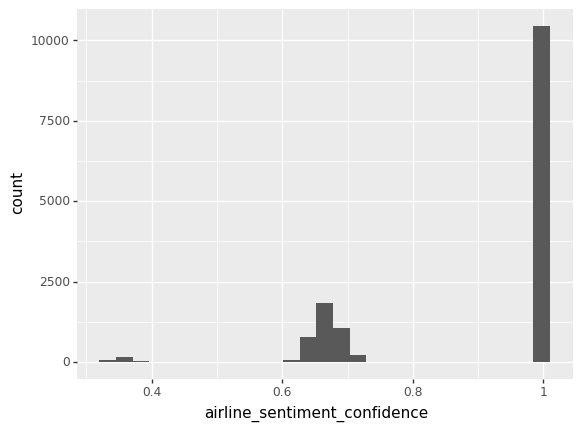

<ggplot: (8786986548740)>

In [110]:
# airline sentiment confidence boxplot
# ggplot(data, aes(x = "airline_sentiment", fill = "airline_sentiment")) + geom_bar() + facet_wrap("airline") + theme(axis_text_x  = element_text(angle = 45, hjust = 1))
ggplot(data, aes(x="airline_sentiment_confidence")) + geom_histogram()


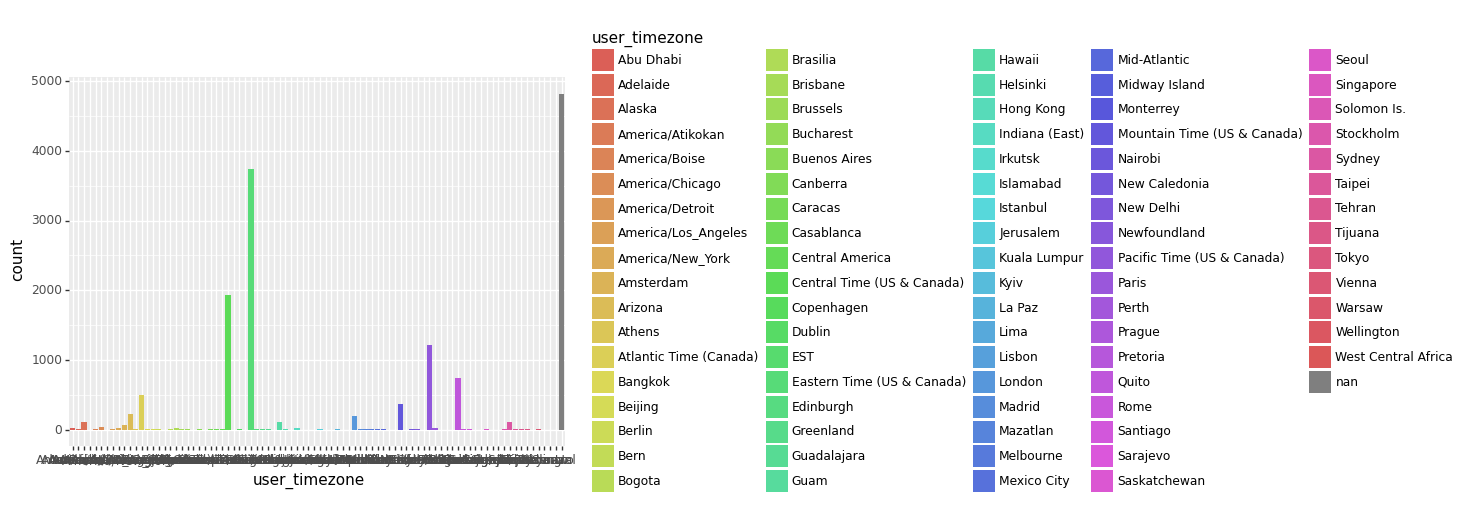

<ggplot: (8786987744428)>

In [111]:
# count timezone (location not accurate)
ggplot(data, aes(x="user_timezone", fill="user_timezone")) + geom_bar()


In [9]:
# 2015-02-24 11:35:52 -0800
data['tweet_created'] =  pd.to_datetime(data['tweet_created'], format='%Y-%m-%d %H:%M:%S')
# data['tweet_created'].apply(lambda x:x.toordinal())
data['tweet_created'].dtypes


datetime64[ns, pytz.FixedOffset(-480)]

In [10]:
data['tweet_created'].head()

0   2015-02-24 11:35:52-08:00
1   2015-02-24 11:15:59-08:00
2   2015-02-24 11:15:48-08:00
3   2015-02-24 11:15:36-08:00
4   2015-02-24 11:14:45-08:00
Name: tweet_created, dtype: datetime64[ns, pytz.FixedOffset(-480)]

In [11]:
data['date'] = data['tweet_created'].dt.strftime("%Y-%m-%d")
data['time'] = data['tweet_created'].dt.strftime("%H:%M:%S")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015-02-24,11:35:52
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:15:59
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015-02-24,11:15:48
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:15:36
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015-02-24,11:14:45


In [12]:
data['date'] = data['date'].astype('str')
data['time'] = data['time'].astype('str')

data['date'] = data['date'].str.replace('-', '')
data['time'] = data['time'].str.replace(':', '')


# date: split by '-'
# data['date'] = data['date'].str.split('-')
# time: split by ':'
# data['time'] = data['time'].str.split(':')
# data['date'].apply(lambda x:x.toordinal())
# data['time'].apply(lambda x:x.toordinal())

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),20150224,113552
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),20150224,111559
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),20150224,111548
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),20150224,111536
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),20150224,111445


In [13]:
data['date']= data['date'].astype('int')
data['time'] = data['time'].astype('int')
data.dtypes

tweet_id                                                         int64
airline_sentiment                                               object
airline_sentiment_confidence                                   float64
negativereason                                                  object
negativereason_confidence                                      float64
airline                                                         object
airline_sentiment_gold                                          object
name                                                            object
negativereason_gold                                             object
retweet_count                                                    int64
text                                                            object
tweet_coord                                                     object
tweet_created                   datetime64[ns, pytz.FixedOffset(-480)]
tweet_location                                                  object
user_t

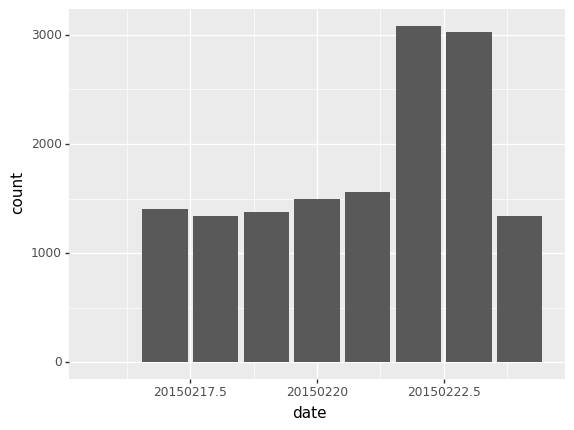

<ggplot: (8770939546534)>

In [37]:
ggplot(data, aes(x="date")) + geom_bar()


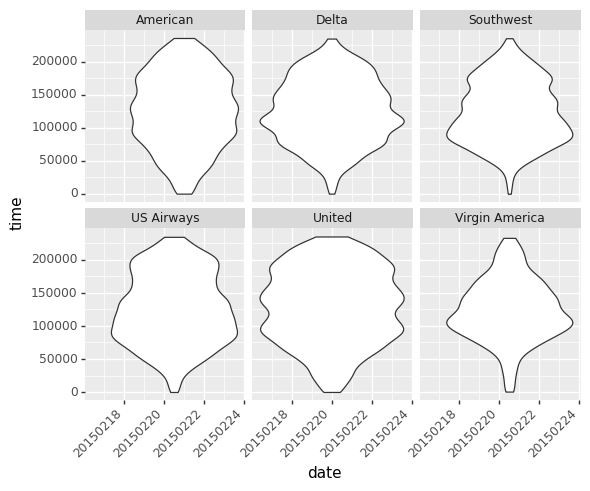

<ggplot: (8770895039874)>

In [47]:
ggplot(data, aes(x="date", y="time")) + geom_violin() + facet_wrap("airline") + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) 


In [14]:
from textblob import TextBlob
# polarity (positive to negative: 1 to -2)
# subjectivity (objective to subjective: 0 to 1)

In [16]:
# Create a functino to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
#Create two new columns ‘Subjectivity’ & ‘Polarity’
data['subjectivity'] = data['text'].apply(getSubjectivity)
data['polarity'] = data['text'].apply(getPolarity)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time,subjectivity,polarity
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),20150224,113552,0.000000,0.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),20150224,111559,0.000000,0.000000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),20150224,111548,0.687500,-0.390625
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),20150224,111536,0.350000,0.006250
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),20150224,111445,0.383333,-0.350000


Objective: 
1) Find out if tweet time is related to the negative/positive review? (user analysis)
    -> if there is correlation, it could mean that time might affect user's moode or affect the flight quality. 
2) Find out what's common reason for good review by creting word cloud. 
3) 

In [17]:
# classification mode: predict whether users will have bad/good review depending on
# their tweet_created time, region, and airline. 
data_1 = data
data_1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time,subjectivity,polarity
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),20150224,113552,0.000000,0.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),20150224,111559,0.000000,0.000000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),20150224,111548,0.687500,-0.390625
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),20150224,111536,0.350000,0.006250
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),20150224,111445,0.383333,-0.350000


In [18]:
# dummy variables for airline
data_1 = pd.get_dummies(data_1, columns=['airline'])
data_1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,...,date,time,subjectivity,polarity,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,570306133677760513,neutral,1.0000,NaN,NaN,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,...,20150224,113552,0.000000,0.000000,0,0,0,0,0,1
1,570301130888122368,positive,0.3486,NaN,0.0000,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,...,20150224,111559,0.000000,0.000000,0,0,0,0,0,1
2,570301083672813571,neutral,0.6837,NaN,NaN,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,...,20150224,111548,0.687500,-0.390625,0,0,0,0,0,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,...,20150224,111536,0.350000,0.006250,0,0,0,0,0,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,...,20150224,111445,0.383333,-0.350000,0,0,0,0,0,1


In [19]:
predictors = ["date", "time", "airline_American",
             "airline_Delta", "airline_Southwest", "airline_US Airways",
             "airline_United", "airline_Virgin America", "polarity",
             "subjectivity"] # timezone?
target = ["airline_sentiment"]

X_train, X_test, y_train, y_test = train_test_split(data_1[predictors], 
                                                    data_1[target], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.6212275693311582
0.6384519867549668
0.9989804241435563
0.5767798013245033
0.9989804241435563
0.6316225165562914


Logistic Regression

In [23]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
grid={"C":np.logspace(-3,3,20), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr_cv=GridSearchCV(lr,grid,cv=10, scoring='accuracy', refit=True)
lr_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6212276103101791


In [24]:
lr2 = LogisticRegression(C=0.001, penalty="l2")
lr2.fit(X_train, y_train)
print(lr2.score(X_train, y_train))
print(lr2.score(X_test, y_test))


0.6212275693311582
0.6384519867549668


<!-- SVM -->

In [184]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train, y_train)
# y_pred_svm = svm.predict(X_test)
# print(accuracy_score(y_test, y_pred_svm))
# print(recall_score(y_test, y_pred_svm, average='macro'))
# print(precision_score(y_test, y_pred_svm, average='macro'))

Decision Tree

In [25]:
param_grid = [{
    'max_depth': [2, 4, 8, 16, 32, 64], 
    'min_samples_leaf': [2, 4, 8, 16]
}]

clf = DecisionTreeClassifier()

np.random.seed(1)
clf_gridsearch = GridSearchCV(clf, param_grid, cv=10,
                             scoring='accuracy', refit=True)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_score_)
print(clf_gridsearch.best_params_)


0.6637406644615034
{'max_depth': 8, 'min_samples_leaf': 16}


In [26]:
clf_model = clf_gridsearch.best_estimator_
print('Training Score:', clf_model.score(X_train, y_train))
print('Testing Score:', clf_model.score(X_test, y_test))


Training Score: 0.6912724306688418
Testing Score: 0.6668046357615894


Random Forest

In [31]:
param_grid = [{
    'max_depth':[2, 4, 8, 16, 32, 64, 128, 256], # 128, 256 added
    'min_samples_leaf':[2, 4, 8, 16]
}]

rf = RandomForestClassifier(n_estimators=200)
np.random.seed(1)

rf_gridsearch = GridSearchCV(rf, param_grid, cv=10,
                            scoring='accuracy', refit=True)
rf_gridsearch.fit(X_train, y_train)

print(rf_gridsearch.best_score_)
print(rf_gridsearch.best_params_)


0.674547005346481
{'max_depth': 64, 'min_samples_leaf': 8}


In [28]:
rf_model = rf_gridsearch.best_estimator_
print('Training Score:', rf_model.score(X_train, y_train))
print('Testing Score:', rf_model.score(X_test, y_test))

Training Score: 0.7203303425774877
Testing Score: 0.6738410596026491


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

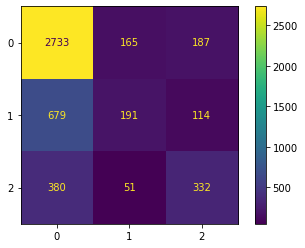

In [48]:

confusion_matrix = metrics.confusion_matrix(y_test, rf_model.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

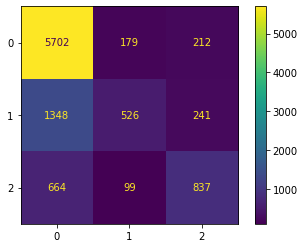

In [49]:
confusion_matrix = metrics.confusion_matrix(y_train, rf_model.predict(X_train))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [53]:
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.72      0.89      0.79      3085
     neutral       0.47      0.19      0.27       984
    positive       0.52      0.44      0.48       763

    accuracy                           0.67      4832
   macro avg       0.57      0.51      0.52      4832
weighted avg       0.64      0.67      0.64      4832



In [54]:
print(classification_report(y_train, rf_model.predict(X_train)))

              precision    recall  f1-score   support

    negative       0.74      0.94      0.83      6093
     neutral       0.65      0.25      0.36      2115
    positive       0.65      0.52      0.58      1600

    accuracy                           0.72      9808
   macro avg       0.68      0.57      0.59      9808
weighted avg       0.71      0.72      0.69      9808



In [29]:
# get importance
importance = rf_model.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importance)[::-1]
 
feat_labels = predictors
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importance[sorted_indices[f]]))


 1) polarity                       0.406032
 2) time                           0.202528
 3) subjectivity                   0.172344
 4) date                           0.058280
 5) airline_Delta                  0.048184
 6) airline_US Airways             0.032292
 7) airline_Southwest              0.026363
 8) airline_Virgin America         0.021803
 9) airline_United                 0.016616
10) airline_American               0.015558


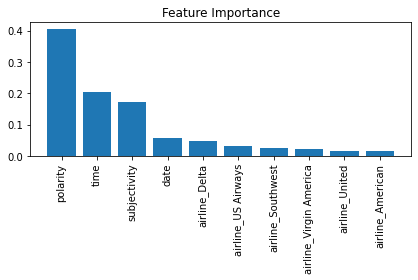

In [30]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()